<a href="https://colab.research.google.com/github/a-apte/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Gradient_Descent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


### IMPORT PACKAGES

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-white')
from sklearn.linear_model import LinearRegression

### DATA LOAD - ABALONE DATASET

In [0]:
##### Make it Hap'n Cap'n #####

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

header = ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']

df = pd.read_csv(url, names = header)
print(df.shape)
df.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### CLEANUP AND FEATURE ENGINEERING

In [0]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [0]:
df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [0]:
# FEATURE ENGINEERING

df['Volume'] = df.Length * df.Diameter * df.Height

df['Rings_squared'] = df['Rings']**2

df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Volume,Rings_squared
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.917937,0.443257
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.923353,0.462183
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.905318,0.466378
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.959871,0.455743
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.922982,0.331492
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.933789,0.414162
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.938357,0.552341
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.544952,0.972071
Volume,0.917937,0.923353,0.905318,0.959871,0.922982,0.933789,0.938357,0.544952,1.000000,0.460591
Rings_squared,0.443257,0.462183,0.466378,0.455743,0.331492,0.414162,0.552341,0.972071,0.460591,1.000000


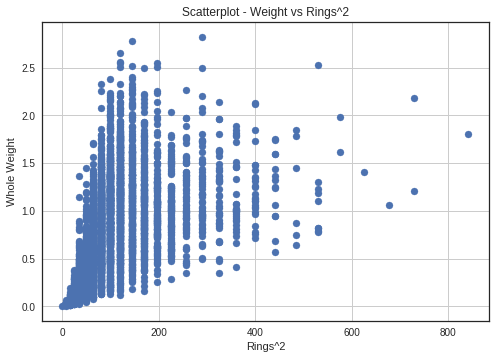

In [0]:
plt.scatter(df.Rings_squared, df.Whole_weight)
plt.grid(True)
plt.xlabel("Rings^2")
plt.ylabel("Whole Weight")
plt.title("Scatterplot - Weight vs Rings^2")

plt.show()

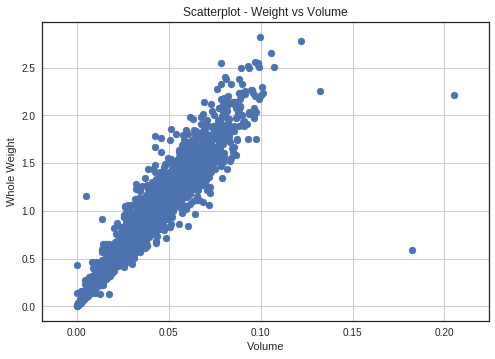

In [0]:
plt.scatter(df.Volume, df.Whole_weight)
plt.grid(True)
plt.xlabel("Volume")
plt.ylabel("Whole Weight")
plt.title("Scatterplot - Weight vs Volume")

plt.show()

### GRADIENT DESCENT

In [0]:
X1 = df.Volume
X2 = df.Rings_squared
y = df.Whole_weight

#### Bivariate Gradient Descent

**sklearn**

In [0]:
def grad_desc_one(X,y):
  X = X.values[:, np.newaxis]
  X = (X - X.mean()) / X.std()
  X_linalg = np.c_[np.ones(X.shape[0]), X]
  print(X_linalg)
  y = y.values
  
  model = LinearRegression()
  model.fit(X, y)
  
  beta_1 = model.coef_[0]
  beta_0 = model.intercept_
  print("\n")
  print("beta_0: ", beta_0)
  print("beta_1: ", beta_1)
  
  
  return None

In [0]:
grad_desc_one(X1,y)

[[ 1.         -0.89538645]
 [ 1.         -1.24665803]
 [ 1.         -0.22051972]
 ...
 [ 1.          1.12099887]
 [ 1.          0.50842926]
 [ 1.          1.99164557]]


beta_0:  0.8287421594445774
beta_1:  0.47065367306764533


In [0]:
grad_desc_one(X2,y)

[[ 1.          1.49018266]
 [ 1.         -0.7721662 ]
 [ 1.         -0.36083004]
 ...
 [ 1.         -0.36083004]
 [ 1.         -0.1165992 ]
 [ 1.          0.44898801]]


beta_0:  0.8287421594445774
beta_1:  0.2234644992866717


**Gradient Descent through recursion**

In [0]:
def clean_X(X):
  X = X.values[:, np.newaxis]
  X = (X - X.mean()) / X.std()
  X_linalg = np.c_[np.ones(X.shape[0]), X]
  
  return X_linalg

In [0]:
def gradient_descent(X, y, theta, iterations, alpha):

  past_costs = []
  past_thetas = [theta]
  for i in range(iterations):
      prediction = np.dot(X, theta)
      error = prediction - y
      cost = 1/(2*n) * np.dot(error.T, error)
      past_costs.append(cost)
      theta = theta - (alpha * (1/n) * np.dot(X.T, error))
      past_thetas.append(theta)
  return past_thetas, past_costs



In [0]:
# Initial Variables
alpha = .01
iterations = 2000
n = len(y)
np.random.seed(237)
theta = [0, 0]




In [0]:
past_thetas1, past_costs1 = gradient_descent(clean_X(X1), y, theta, iterations, alpha)

final_theta1 = past_thetas1[-1]

print("Gradient Descent Results: {:.5f}, {:.5f}".format(final_theta1[0], final_theta1[1]))

Gradient Descent Results: 0.82874, 0.47065


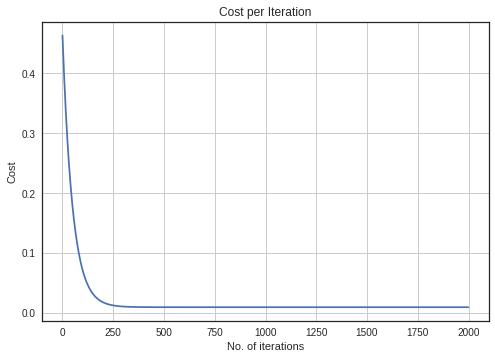

In [0]:
# Show cost decreasing with additional iterations
plt.title('Cost per Iteration')
plt.grid(True)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs1)
plt.show()

In [0]:
past_thetas2, past_costs2 = gradient_descent(clean_X(X2), y, theta, iterations, alpha)

final_theta2 = past_thetas2[-1]

print("Gradient Descent Results: {:.5f}, {:.5f}".format(final_theta2[0], final_theta2[1]))

Gradient Descent Results: 0.82874, 0.22346


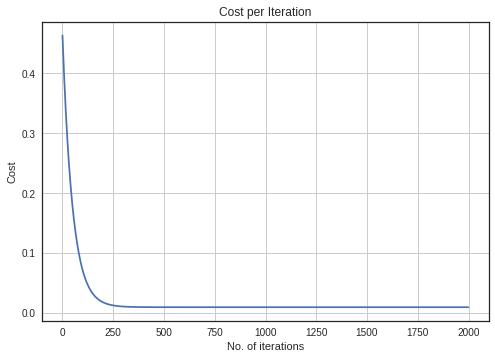

In [0]:
# Show cost decreasing with additional iterations
plt.title('Cost per Iteration')
plt.grid(True)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs1)
plt.show()

#### Multivariate Gradient Descent

**sklearn**

In [0]:
def grad_desc_two(X,y):
  X = X.values
  X = (X - X.mean()) / X.std()
  X_linalg = np.c_[np.ones(X.shape[0]), X]
  print(X_linalg)
  y = y.values
  
  model = LinearRegression()
  model.fit(X, y)
  
  beta_1 = model.coef_[0]
  beta_2 = model.coef_[1]
  beta_0 = model.intercept_
  print("\n")
  print("beta_0: ", beta_0)
  print("beta_1: ", beta_1)
  print("beta_2: ", beta_2)
 
  
  return None

In [0]:
X3 = df[['Volume','Rings_squared']]

grad_desc_two(X3,y)

[[ 1.         -0.70417125  2.20078108]
 [ 1.         -0.70426718 -0.07169654]
 [ 1.         -0.70398695  0.34148121]
 ...
 [ 1.         -0.70362059  0.34148121]
 [ 1.         -0.70378788  0.5868055 ]
 [ 1.         -0.70338282  1.15492491]]


beta_0:  1203.9084323643099
beta_1:  1709.1063418581946
beta_2:  0.008447849910297511


**Gradient Descent through recursion**

In [0]:
def clean_X_mult(X):
  X = X.values
  X = (X - X.mean()) / X.std()
  X_linalg = np.c_[np.ones(X.shape[0]), X]
  
  return X_linalg

# clean_X_mult(X3)

In [0]:
def gradient_descent_mult(X, y, theta, iterations, alpha):

  past_costs = []
  past_thetas = [theta]
  for i in range(iterations):
      prediction = np.dot(X, theta)
      error = prediction - y
      cost = 1/(2*n) * np.dot(error.T, error)
      past_costs.append(cost)
      theta_0 = theta[0] - (alpha * (1/n) * np.dot(X.T[0], error))
      theta_1 = theta[1] - (alpha * (1/n) * np.dot(X.T[1], error))
      theta_2 = theta[2] - (alpha * (1/n) * np.dot(X.T[2], error))   
      theta = [theta_0,theta_1,theta_2]
      past_thetas.append(theta)
  return past_thetas, past_costs

In [166]:
theta3 = [0,0,0]
alpha3 = .01

past_thetas3, past_costs3 = gradient_descent_mult(clean_X_mult(X3), y, theta3, iterations, alpha3)

final_theta3 = past_thetas3[-1]

print("Gradient Descent Results: {:.10f}, {:.10f}, {:.10f}".format(final_theta3[0], final_theta3[1], final_theta3[2]))

Gradient Descent Results: 0.4503121357, -0.3149897396, 0.2225413649


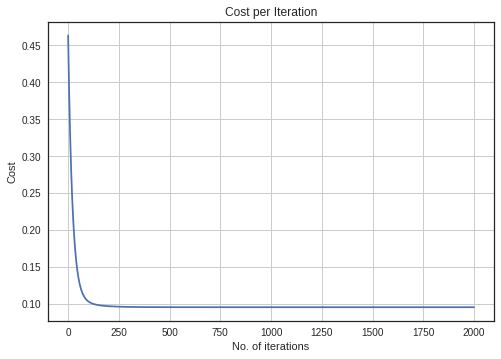

In [162]:
# Show cost decreasing with additional iterations
plt.title('Cost per Iteration')
plt.grid(True)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs3)
plt.show()

**TIE BREAKER**

In [139]:
import statsmodels.api as sm

X3_2 = df[['Volume','Rings_squared']]

X3_2 = clean_X_mult(X3_2)


print(sm.OLS(y, X3_2).fit().summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:           Whole_weight   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.453e+04
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:50:45   Log-Likelihood:                 2366.8
No. Observations:                4177   AIC:                            -4728.
Df Residuals:                    4174   BIC:                            -4709.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1203.9084      6.172    195.048      0.0

**It appears as if the gradient descent in the multivariate case converged to a local minimum which doesn't correspond to the global minimum found under OLS.**

### Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)